In [11]:
import seaborn as sns
sns.set()
%matplotlib inline
from skimage.io import imread
from glob import glob
from random import sample
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
real_path = '/lfs/jonas/nevils/results/first200/real/'
real_glob = glob(real_path + '*.png')
fake_path = '/lfs/jonas/nevils/results/first200/fake/'
fake_glob = glob(fake_path + '*.png')
rec_path = '/lfs/jonas/nevils/results/first200/rec/'
rec_glob = glob(rec_path + '*.png')
batch_size = 50

In [3]:
real_A_glob = [path for path in real_glob if 'real_A' in str(path)]
fake_A_glob = [path for path in fake_glob if 'fake_A' in str(path)]

In [4]:
real_lo_path = '/data/Ro_ImageData/Low SN ratio ceramic images/'
real_lo_glob = glob(real_lo_path + '*.tiff')

In [5]:
samp_real_A = sample(real_A_glob, batch_size)
real_A_list = []
for idx, samp in enumerate(samp_real_A):
    samp_img = np.array(imread(samp)/2**8).flatten()
    real_A_list += [samp_img]

real_A = np.asarray(real_A_list)
flat_real_A = real_A.flatten()

In [6]:
samp_real_lo = sample(real_lo_glob, batch_size)
real_lo_list = []
for idx, samp in enumerate(samp_real_lo):
    samp_img = np.array(imread(samp)/2**16).flatten()
    real_lo_list += [samp_img]

real_lo = np.asarray(real_lo_list)

In [7]:
samp_fake_A = sample(fake_A_glob, batch_size)
fake_A_list = []
for idx, samp in enumerate(samp_fake_A):
    samp_img = np.array(imread(samp)/2**8).flatten()
    fake_A_list += [samp_img]

fake_A = np.asarray(fake_A_list)
flat_fake_A = fake_A.flatten()

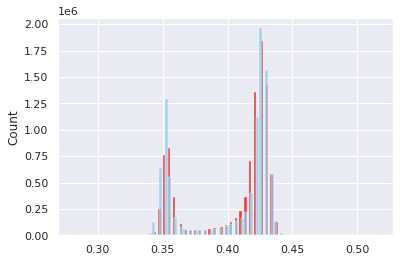

In [8]:
sns.histplot(flat_real_A, color = 'red', bins=100)
sns.histplot(flat_fake_A, color = 'skyblue', bins=100)

In [12]:
ks_2samp(flat_real_A, flat_fake_A)

KstestResult(statistic=0.105894775390625, pvalue=0.0)